Import pliku .csv i odczyt danych

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_org = pd.read_csv('Customers.csv', sep=';', decimal=',')
dataset = pd.read_csv('Customers.csv', sep=';', decimal=',')


1.   Sprawdzenie wartości odstających (5%, 95% zbioru)
2.   Obliczenie średniej,min,max,mediany itp. dla danej kolumny
3.   Użycie "elbow method" w celu znalezienia odpowiedniej liczby segmentów
4.   Użycie algorytmu K-means do wykonania segmentacji klientów


Mean value: 15.847121111846459
Sum of value: 23945
Max value: 91
Min value: 1
Count of value: 1511
Median value: 6.0
Std of value: 19.051823450941686
Var of value: 362.9719768058516


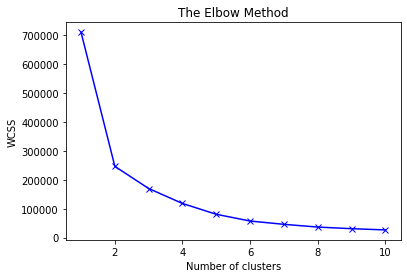

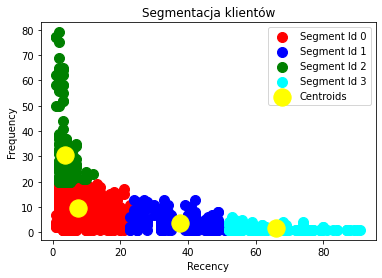

In [ ]:
# print(dataset['Monetary'].quantile(.05))
# print(dataset['Monetary'].quantile(.95))
dataset['Profit'] = np.where(dataset['Profit'] < 12.0, 12.0, dataset['Profit'])
dataset['Profit'] = np.where(dataset['Profit'] > 2215.0, 2215.0, dataset['Profit'])

dataset['Monetary'] = np.where(dataset['Monetary'] < 132.0, 132.0, dataset['Monetary'])
dataset['Monetary'] = np.where(dataset['Monetary'] > 120000.0, 120000.0, dataset['Monetary'])

# removed_outliers_Profit = dataset['Monetary'].between(dataset['Monetary'].quantile(.05), dataset['Monetary'].quantile(.95))
# stats
mean1 = dataset['Recency'].mean()
sum1 = dataset['Recency'].sum()
max1 = dataset['Recency'].max()
min1 = dataset['Recency'].min()
count1 = dataset['Recency'].count()
median1 = dataset['Recency'].median()
std1 = dataset['Recency'].std()
var1 = dataset['Recency'].var()
# print stats
print('Mean value: ' + str(mean1))
print('Sum of value: ' + str(sum1))
print('Max value: ' + str(max1))
print('Min value: ' + str(min1))
print('Count of value: ' + str(count1))
print('Median value: ' + str(median1))
print('Std of value: ' + str(std1))
print('Var of value: ' + str(var1))

#X = dataset.iloc[:, [4, 3]].values
X = dataset.iloc[:, 2:4].values

# data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
# print('Normalized : ', X[:5, :])

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Applying KMeans to the dataset with the optimal number of cluster
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Segment Id 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Segment Id 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Segment Id 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Segment Id 3')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Segment Id 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Segmentacja klientów')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Po wykonaniu segmentacji klientów uzyskano 4 segmenty, następnie przedstawiono ilość klientów w danym segmencie na wykresie. 

Kolejną czynnością jest utworzenie nowych kolumn w arkuszu i przypisanie odpowiedniego ID segmentu każdemu klientowi. Następnie na podstawie SegmentId, przypisanie nazwy dla poszczególnej grupy:

1.   Nowy/Aktywny klient
2.   Odchodzacy klient
3.   Stary/nieaktywny klient
4.   Staly klient


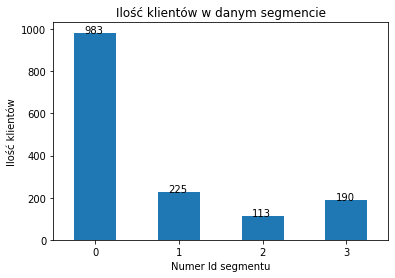

           CustomerId       Profit  ...       Monetary   Variance
                 mean         mean  ...           mean       mean
SegmentId                           ...                          
0          745.519837   621.091556  ...  111180.575198  16.598169
1          778.053333   405.364444  ...    9492.453556   6.360000
2          783.256637   256.442478  ...   58794.221858   3.920354
3          767.894737  4921.026316  ...  773315.170737  36.857895

[4 rows x 6 columns]


In [ ]:
# check number of customers in clusters
df = dataset_org['SegmentId'].value_counts(sort=False)
ax = df.plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/4, p.get_height()))
plt.xlabel("Numer Id segmentu")
plt.ylabel("Ilość klientów")
plt.title("Ilość klientów w danym segmencie")
plt.show()

print(dataset_org.groupby('SegmentId').agg(['mean']))

# add clusters to the dataframe
dataset_org["SegmentId"] = y_kmeans

# 'nowy klient, potencjalny stały bywalec'
# 'odchodzący klient'
# 'stały klient'
# 'przypadkowy nieaktywny klient'


dataset_org.loc[(dataset_org.SegmentId == 0), "SegmentName"] = "Nowy/Aktywny klient"
dataset_org.loc[(dataset_org.SegmentId == 1), "SegmentName"] = "Odchodzacy klient"
dataset_org.loc[(dataset_org.SegmentId == 2), "SegmentName"] = "Stary/Nieaktywny klient"
dataset_org.loc[(dataset_org.SegmentId == 3), "SegmentName"] = "Staly klient"
dataset_org.to_csv("Customers.csv", sep=';', decimal=',', index=False)